In [80]:
#importing the libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
#importing data
data = pd.read_csv('D3.csv')

print(data)
X = np.array(data.iloc[:,0:3])

Y = data.iloc[:,3]
print(X)
print(Y)




           0      3.44      0.44  4.387545011
0   0.040404  0.134949  0.888485     2.679650
1   0.080808  0.829899  1.336970     2.968490
2   0.121212  1.524848  1.785455     3.254065
3   0.161616  2.219798  2.233939     3.536375
4   0.202020  2.914747  2.682424     3.815420
..       ...       ...       ...          ...
94  3.838384  1.460202  3.046061    -4.440595
95  3.878788  2.155152  3.494545    -4.458663
96  3.919192  2.850101  3.943030    -4.479995
97  3.959596  3.545051  0.391515    -3.304593
98  4.000000  0.240000  0.840000    -5.332455

[99 rows x 4 columns]
[[0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]
 [0.2020202  2.91474747 2.68242424]
 [0.24242424 3.60969697 3.13090909]
 [0.28282828 0.30464646 3.57939394]
 [0.32323232 0.99959596 0.02787879]
 [0.36363636 1.69454546 0.47636364]
 [0.4040404  2.38949495 0.92484849]
 [0.44444444 3.08444444 1.37333333]
 [0.48484848 3.77939394 1.821

In [76]:
#multivariate regression using gradient descent
def multipleRegression(X,Y,alpha,epoch):
  m = data.shape[0]
  ones = np.ones((m,1))
  X = np.concatenate((ones,X), axis=1)    #new X with X0 = 1
  n = X.shape[1]
  w= np.ones(n) #n=4 and w contains w0, w1, w2, w3......params initialization
  
  h = np.dot(X,w)   #calculating hypothesis. the model basically

  #done with linear regression model and now we will implement gradient descent

  cost = np.ones(epoch) #setting cost array that calculates the cost J(w,b)

  for i in range(0,epoch):
    w[0] = w[0] - (alpha /m) * sum(h - Y)
    for j in range(1,n):
      w[j] = w[j] - (alpha/m) * sum(( h- Y) * X[:,j])
    
    h = np.dot(X,w)

    cost[i] = 1/(2*X.shape[0]) * sum(np.square(h-Y))
    print(cost)
  
  return cost, w

In [79]:
#calculating cost and w
cost,w = multipleRegression(X,Y,0.1,2000)
print(w)

[6.8448108 1.        1.        ... 1.        1.        1.       ]
[6.8448108  3.78750173 1.         ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        ]
[6.8448108  3.78750173 2.9722028  ... 1.         1.         1.        

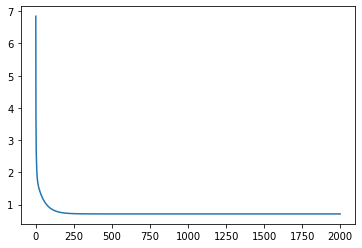

In [81]:
plt.plot(cost)
xlabel='epoch/iterations'
ylabel='cost or loss'
plt.show()

In [92]:
#getting some predictions
X_pred = np.array([1,2,3,0]) #we added 1 here for w0 manually

Y_pred = np.dot(X_pred,w)
print(Y_pred)

3.013352424647953


In [87]:
#comparing the sklearn and our gradient descent

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [93]:
lm.predict([[2,3,0]])

array([3.01335243])

In [95]:
print(lm.coef_)
print(lm.intercept_)

[-2.04203041  0.56122155 -0.29212884]
5.413748593457117


these coef_ and intercept_ are almost the same as that we used for our prediction through gradient descent
